# Trigonometric Interpolation
> Authors: Sebastian (Pockenauer | Kranzinger), Martin Dallinger

#### Sources
Approach one: http://sites.science.oregonstate.edu/~restrepo/475A/Notes/sourcea.pdf

Approach two: https://en.wikipedia.org/wiki/Trigonometric_interpolation

# Introduction
Trigonometric interpolation is a method used to approximate a function using a **finite set of trigonometric functions**. In this notebook we will consider both approaches:
1. Creating a trigonometric function for approximating a function with a **evenly-spaced subset of points** by **(ab)using complex numbers and trigonometric identities**
2. Creating a trigonometric function which hits n **different arbitrary 2d-points** (which arbitrary spacing on the x-axis between them on the horizontal line) by using **Lagrange Interpolation**

The reason we split up this tasks in the two parts is that the first approach gives great insight in the relationship between complex numbers and trigonometric functions and their operations, which is - in our opinion - too beautiful not to show and the second part works in a general case.

The main reason for using trigonometric interpolation is to **represent a function using a finite number of terms**, which can be useful for **data compression and signal processing applications**. The intent is to find the best approximation of the function, within a certain error tolerance, using a minimal number of terms. It also widely used in **signal processing, image processing, and many other fields** for the purpose of data compression and reconstruction.


## Basic Constraints
Interpolation is finding new data points based on known datapoints. In our case we want to construct a trigonometric function, which precisely hits all given points.

The goal is to approximate a function by using a trigonometric polynomial - according to Fouriers Theorems, a trigonometric polynomial with n variables can be constructed in the following way:

$$
p_n(t)=a_0+\sum_{\ell=1}^n\left[a_{\ell} \cos (\ell t)+b_{\ell} \sin (\ell t)\right]
$$

For solving this with polynomial approximation, we first transfer this to an equivalent equation in the complex plane:
[Check out our visualisation in GeoGebra](https://www.geogebra.org/calculator/c4hgvp5f)

Once playing the animation, one can see that z7 is moving on the real axis over the time variable t from 1 to -1 like `sin(x)` would behave, this behavior (phase shift and amplitude) can be altered by changing the parameters `a` and `b` of the complex numbers `z1` and `z2`, which are the only inputs:  
![Image of a complex trigonometric function](images/trigInterpolation.png)

## Formalizing the interpolation task
For an $n^{\text {th }}$ degree trigonometric polynomial approximation of $f(x)$ we want $f\left(t_{\ell}\right)=p_n\left(t_{\ell}\right) \quad \ell=0,1,2, \ldots, 2 n$ where
$$
0 \leq t_0<t_1<t_2 \cdots<t_{2 n}<2 \pi .
$$
We need $2 n+1$ points in $t$ since we need to fix $2 n+1$ coefficients. Recall that $e^{i \theta}=\cos \theta+i \sin \theta$, hence (35) can be recast as
$$
p_n(t)=\sum_{\ell=-n}^n c_{\ell} e^{i \ell t}
$$
where $c_0=a_0 \quad c_{\ell}=\frac{1}{2}\left(a_{\ell}-i b_{\ell}\right) \quad c_{-\ell}=\frac{1}{2}\left(a_{\ell}+i b_{\ell}\right)$, for $1 \leq \ell \leq n$. So, to determine the $\left\{c_{\ell}\right\}$ 's we can find $\left\{a_{\ell}\right\}$ and $\left\{b_{\ell}\right\}$ (or vice versa).
Let $z=e^{i t}$. Then
$$
p_n(z)=\sum_{\ell=-n}^n c_{\ell} z^{\ell} .
$$
Thus, $z^n p_n(z)$ is a polynomial of degree $\leq 2 n$.
Interpolation requires that
$$
p_n\left(z_{\ell}\right)=f\left(t_{\ell}\right) \quad \ell=0,1, \cdots, 2 n .
$$

Define a grid of points by
$$
t_{\ell}=\frac{2 \pi}{2 n+1} \ell \quad \ell=0,1, \ldots, 2 n
$$

Another custom GeoGebra animation, which can be found [here](https://www.geogebra.org/calculator/yjed3dv4) illustrates this grid of points in the range from 0 to $2 \pi$. Nonetheless, it is important to notice, that it is **not continuous** (as is misleadingly implied by the blue-ish background), since $l$ has a step-size of 1.

![pointGrid](images/pointGrid.png)

## Solution
Theorem: Let $\left\{t_{\ell}\right\}_{\ell=0}^{2 n}$. Then the coefficients $c_k$ of
$$
p_n\left(t_{\ell}\right) = \sum_{k=-n}^n c_k e^{i k t_{\ell}}
$$
for $\ell=0,1 \cdots, 2 n$ are given by
$$
c_k=\frac{1}{2 n+1} \sum_{\ell=0}^{2 n} e^{-i k t_{\ell}} f\left(t_{\ell}\right) \quad k=-n, \ldots, n
$$

Further, the real part $a_{\ell}$ of the coefficient (as defined above, such that $c_{\ell}$ is $\frac{1}{2}\left(a_{\ell}-i b_{\ell}\right)$) can be extracted by adding the complex coefficient to its complex conjugate:
$$a_{\ell}=c_{\ell}+c_{-\ell}=\frac{1}{2 n+1} \sum_{k=0}^{2 n}\left(e^{-i \ell t_k}+e^{i \ell t_k}\right) f\left(t_k\right)=\frac{2}{2 n+1} \sum_{k=0}^{2 n} f\left(t_k\right) \cos \ell t_k, $$


And the complex part (again, because of our special definition) can be calculated, by performing the following operation:
$$
b_{\ell}=i\left(c_{-\ell}-c_{\ell}\right)=\frac{2}{2 n+1} \sum_{k=0}^{2 n} f\left(t_k\right) \sin \ell t_k
$$

## Proof
Proof: Want $p_n\left(t_{\ell}\right)=f\left(t_{\ell}\right) \quad$ for $\ell=0,1, \ldots, 2 n$. Hence
$$
\sum_{m=-n}^n c_m e^{i m t_{\ell}}=f\left(t_{\ell}\right) \quad \text { for } \ell=0,1, \ldots, 2 n .
$$
Multiply both sides by $e^{-i k t_{\ell}}$ and sum over $0 \leq \ell \leq 2 n$ (as this will cancel out conveniently later),
$$
\sum_{\ell=0}^{2 n} \sum_{m=-n}^n c_m e^{i(m-k) t_{\ell}}=\sum_{\ell=0}^{2 n} e^{-i k t_{\ell}} f\left(t_{\ell}\right)
$$
and interchange the order of summations on the left hand side:
$$
\sum_{m=-n}^n c_m \underbrace{\sum_{\ell=0}^{2 n} e^{i(m-k) t_{\ell}}}_{\text {look at this now }}=\sum_{\ell=0}^{2 n} e^{-i k t_{\ell}} f\left(t_{\ell}\right) .
$$
When $m=k$
$$
\sum_{\ell=0}^{2 n} e^{i(m-k) t_{\ell}}=\sum_{\ell=0}^{2 n} 1=2 n+1 .
$$

When $m \neq k$, the result is 0:

First note that $i(m-k) t_{\ell}=\frac{i \ell(m-k) 2 \pi}{2 n+1}$.
Let $r=e^{i(m-k) 2 \pi /(2 n+1)}$ and note $r^{2 n+1}=1$. Thus
$$
\sum_{\ell=0}^{2 n} e^{i(m-k) t_{\ell}}=\sum_{\ell=0}^{2 n} r^{\ell}=\frac{r^{2 n+1}-1}{r-1}=0 .
$$

Thus, we conclude from the double summation and the case of m=k:
$$
c_k=\frac{1}{2 n+1} \sum_{\ell=0}^{2 n} e^{-i k t_{\ell}} f\left(t_{\ell}\right) \quad k=-n, \cdots n
$$

## Example from the paper
Find the trigonometric polynomial interpolation of degree 2 to $f(t)=e^{\sin t+\cos t}$ on $[0,2 \pi]$
$$
p_2(t)=\frac{a_0}{2}+a_1 \cos t+a_2 \cos 2 t+b_1 \sin t+b_2 \sin 2 t
$$
such that $p_2\left(t_{\ell}\right)=e^{\sin t_{\ell}+\cos t_{\ell}} \quad t_{\ell}=\frac{2 \pi}{5} \ell$ where $\ell=0,1,2,3,4$.
$$
\begin{aligned}
& a_{\ell}=\frac{2}{2 n+1} \sum_{k=0}^{2 n} f\left(t_k\right) \cos \ell t_k \\
& b_{\ell}=\frac{2}{2 n+1} \sum_{k=0}^{2 n} f\left(t_k\right) \sin \ell t_k . \\
& \Rightarrow a_0=3.12764 \quad a_1=1.24872 \quad a_2=-0.09426 \quad b_1=1.27135 \quad b_2=0.49441 .
\end{aligned}
$$

![Example trigonometric interpolation from the paper](images/exampleInterpolation.png)

Feel free to also check and play around with the [visualisation in GeoGebra](https://www.geogebra.org/calculator/c8pdmtqv)

## General case
The formulas used above only work, if a similar function f(x) is already known, however it does not work with arbitrary data points. Furthermore, as previously, there should be no assumption about equidistance or similar restrictive concepts.

Therefore, [here](https://en.wikipedia.org/wiki/Trigonometric_interpolation) we found a general case, which builds upon the previous ideas and uses the Lagrange formula for polynomial interpolation:

The polynomial formulation in the complex plane yields that the solution can be written in the form for N points
$$
p(x)=\sum_{k=0}^{N} y_k t_k(x)
$$
where the basis functions can be determined in the following way:
$$
t_k(x)=e^{-i N/2 x+i N/2 x_k} \prod_{\substack{m=0 \\ m \neq k}}^{2 N} \frac{e^{i x}-e^{i x_m}}{e^{i x_k}-e^{i x_m}}
$$
This is a special case of Lagrange interpolation, which is explained step by step here:
1. To simplify the problem, we start with a set of real points.
![image.png](images/lagrange1.png)
2. The goal of finding the basis functions (Lagrange polynomial) is to find a function that passes through $f(x)=1$ at one given point (point E in this case) and through $f(x)=0$ at all other points.
![image.png](images/lagrange2.png)
3. The resulting lagrange polynomial looks as follows:
![image.png](images/lagrange3.png)
4. Scaling the polynomial by the $y$-value of the point results in the function passing through the point, while all $f(x)=0$ stays for all other points.
![image.png](images/lagrange4.png)
5. Summing all the scaled polynomials for all points results in a polynomial that passes through all points.
![image.png](images/lagrange5.png)
6. To achieve the original formula, instead of an interpolation of real numbers, complex numbers are used instead, where each complex number represents a sine wave (where the amplitude constitutes to the radius and the phase-shift constitutes to the angle), resulting in the basis function
$$
t_k(x)=e^{-i (N/2) x+i (N/2) x_k} \prod_{\substack{m=0 \\ m \neq k}}^{N} \frac{e^{i x}-e^{i x_m}}{e^{i x_k}-e^{i x_m}}
$$
The factor $e^{-i K x+i K x_k}$ in the above formula compensates for the fact that the complex plane formulation contains also negative powers of $e^{i x}$ and is therefore not a polynomial expression in $e^{i x}$. The correctness of this expression can easily be verified by observing that $t_k\left(x_k\right)=1$ and that $t_k(x)$ is a linear combination of the right powers of $e^{i x}$. Upon using the identity
$$
e^{i z_1}-e^{i z_2}=2 i \sin \frac{1}{2}\left(z_1-z_2\right) e^{\left(z_1+z_2\right) i / 2}
$$
the coefficient $t_k(x)$ can be written in the form
$$
t_k(x)=\prod_{\substack{m=0 \\ m \neq k}}^{N} \frac{\sin \frac{1}{2}\left(x-x_m\right)}{\sin \frac{1}{2}\left(x_k-x_m\right)}
$$


# Implementation in Python

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [6]:
def basis_fun(k, x, xlist):
  product = 1
  for m in range(len(xlist)):
    if m == k:
      continue
    product *= math.sin(1/2*(x-xlist[m]))/math.sin(1/2*(xlist[k]-xlist[m]))
  return product
  
def lagrange_interpolation(curr_x, x, y):
  temp_sum = 0
  for k in range(x.size):
    temp_sum += y[k] * basis_fun(k, curr_x, x)
  return temp_sum

def trig_interpolate(points, plot = False):
  x = np.array([x for x,y in points])
  y = np.array([y for x,y in points])
  plot_space = np.linspace(min(x)-5,max(x)+5, 400)

  u,c = np.unique(x, return_counts=True)
  assert len(u[c>1]) == 0, "The x values must be unique - otherwise the input is not functional"

  mapped_fun_points = np.array(list(map(lambda x_val: lagrange_interpolation(x_val,x,y), plot_space)))

  if plot:
    
    plt.scatter(x,y)
    plt.plot(plot_space, mapped_fun_points)
  
  return mapped_fun_points

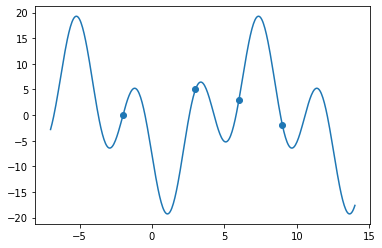

In [9]:
y_vals = trig_interpolate(points = {(-2,0),(3,5),(6,3), (9, -2)}, plot= True)